# KMeans Clustering

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import cluster


In [2]:
# Load csv file 
df = pd.read_csv('./preprocessed_data/norm_data_standardized.csv', index_col=False)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.779975,-0.179534,-0.283909,-0.343666,2.0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.420693,-0.179534,-0.611387,-0.343666,2.0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.129474,-0.179534,1.353485,-0.343666,2.0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


In [5]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [6]:
X.shape

(699, 9)

In [7]:
X = X.to_numpy()


In [8]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [9]:
clusters = len(np.unique(y))
print(clusters)

2


In [16]:
k = KMeans(K=3, max_iters=150, plot_steps=True)


ValueError: Unrecognized marker style array([-0.54916811,  0.80566193, -0.0975581 , -0.54916811, -0.54916811,
       -0.54916811, -0.54916811, -0.54916811, -0.54916811, -0.54916811,
       -0.54916811, -0.54916811, -0.54916811, -0.54916811, -0.54916811,
       -0.54916811, -0.54916811, -1.00077813, -0.54916811, -0.54916811,
       -0.54916811, -0.54916811, -0.54916811, -1.00077813, -0.54916811,
       -0.54916811, -0.54916811, -0.54916811, -0.54916811, -0.0975581 ,
       -0.54916811, -0.54916811, -0.54916811, -0.54916811, -0.54916811,
       -0.54916811, -1.00077813, -0.54916811, -0.54916811, -0.54916811,
       -0.54916811, -0.54916811, -0.0975581 , -0.54916811, -0.54916811,
       -0.54916811])

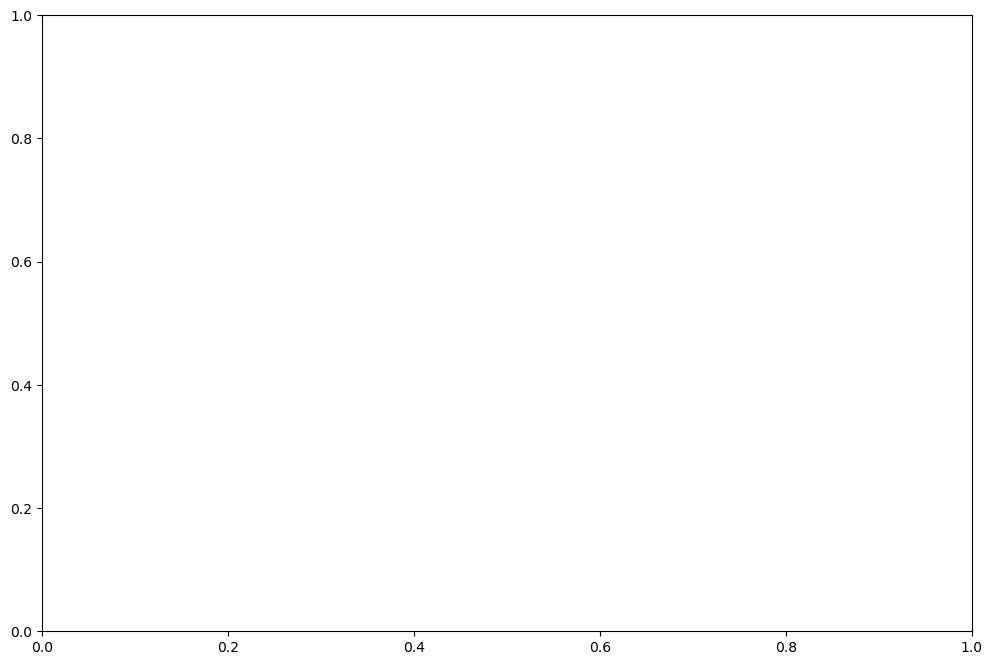

In [17]:
y_pred = k.predict(X)

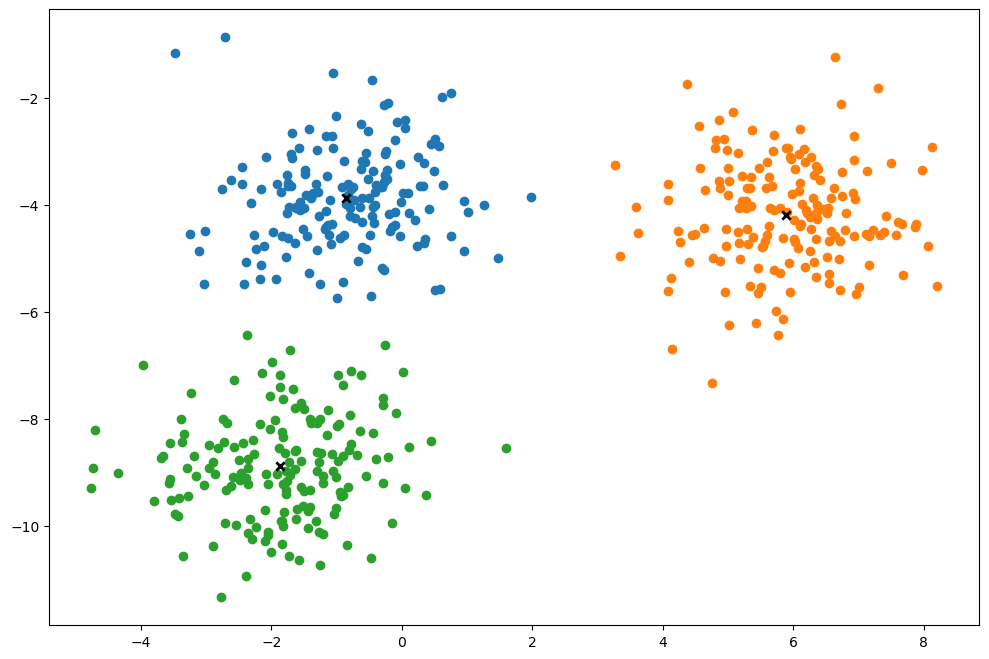

In [21]:
k.plot()